>we will do a simple diabetics prediction but use the concept of hypertunning in  deep learning 

In [240]:
import numpy as np
import pandas as pd 
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,BatchNormalization
import matplotlib.pyplot as plt

In [241]:
df=pd.read_csv("diabetes.csv")

In [242]:
np.shape(df)

(768, 9)

In [243]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [244]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

In [245]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [246]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [247]:
model=Sequential()
model.add(Dense(16,activation="relu",input_dim=8))

model.add(Dense(8,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

/Users/owner/Desktop/deep-learning/deep_learning/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [248]:
history=model.fit(X_train,y_train,epochs=200,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5104 - loss: 0.7078 - val_accuracy: 0.5677 - val_loss: 0.6932
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6354 - loss: 0.6689 - val_accuracy: 0.6875 - val_loss: 0.6551
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6719 - loss: 0.6405 - val_accuracy: 0.6823 - val_loss: 0.6263
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7049 - loss: 0.6163 - val_accuracy: 0.6719 - val_loss: 0.6008
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7083 - loss: 0.5937 - val_accuracy: 0.6927 - val_loss: 0.5750
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7188 - loss: 0.5722 - val_accuracy: 0.7292 - val_loss: 0.5520
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7188 - loss: 0.5524 - val_accuracy: 0.7448 - val_loss: 0.5340
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7309 - loss: 0.5358 - val_accuracy: 0.7448 - v

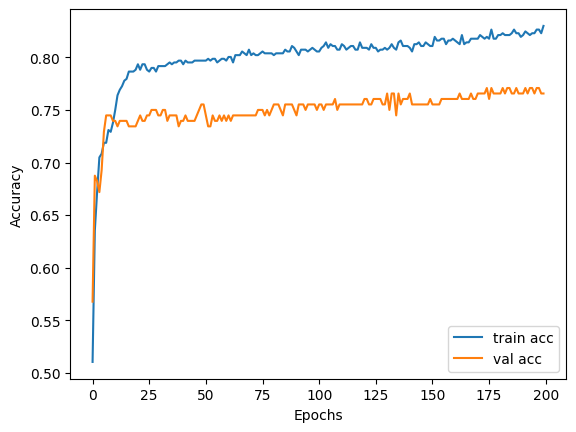

In [249]:
plt.plot(history.history['accuracy'], label="train acc")
plt.plot(history.history['val_accuracy'], label="val acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

# using hypertuning 

In [250]:
import keras_tuner as kt
from keras.layers import Dropout

In [251]:
def build_model(hp):
    model=Sequential()
    counter=0
    for i in range (hp.Int("num_layers",min_value=1,max_value=10)):
        
        if counter==0:
            model.add(
                Dense(hp.Int("units"+str(i),min_value=8,max_value=128,step=8),
                    activation=hp.Choice("activation"+str(i),values=["relu","tanh","elu",],
                                        ),input_dim=8))
            model.add(Dropout(hp.Choice("dropout"+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6])
                              ))
        else:
            model.add(
                Dense(hp.Int("units"+str(i),min_value=8,max_value=128,step=8),
                    activation=hp.Choice("activation"+str(i),values=["relu","tanh","elu",],
                                        )))
            model.add(Dropout(hp.Choice("dropout"+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6])
                              ))
        counter+=1
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=hp.Choice("optimizer",values=["adam","rmsprop","sgd","adadelta"]),
                      loss="binary_crossentropy",metrics=["accuracy"])    

    return model    

In [252]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=5,directory="new",project_name="diabetics")

In [253]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.71875

Best val_accuracy So Far: 0.7552083134651184
Total elapsed time: 00h 00m 08s


In [254]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'units0': 80,
 'activation0': 'tanh',
 'dropout0': 0.2,
 'optimizer': 'rmsprop',
 'units1': 8,
 'activation1': 'relu',
 'dropout1': 0.1,
 'units2': 8,
 'activation2': 'relu',
 'dropout2': 0.1}

In [255]:
model=tuner.get_best_models(num_models=1)[0]

/Users/owner/Desktop/deep-learning/deep_learning/lib/python3.13/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [256]:
history=model.fit(X_train,y_train,epochs=150,validation_data=(X_test,y_test),initial_epoch=6)

Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7292 - loss: 0.5885 - val_accuracy: 0.7448 - val_loss: 0.5438
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7587 - loss: 0.5277 - val_accuracy: 0.7448 - val_loss: 0.5072
Epoch 9/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7569 - loss: 0.5063 - val_accuracy: 0.7344 - val_loss: 0.4938
Epoch 10/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7569 - loss: 0.5095 - val_accuracy: 0.7292 - val_loss: 0.4903
Epoch 11/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7795 - loss: 0.4822 - val_accuracy: 0.7292 - val_loss: 0.4906
Epoch 12/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7830 - loss: 0.4747 - val_accuracy: 0.7344 - val_loss: 0.4916
Epoch 13/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7760 - loss: 0.4691 - val_accuracy: 0.7448 - val_loss: 0.4926
Epoch 14/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7708 - loss: 0.4876 - val_accuracy: 0.750

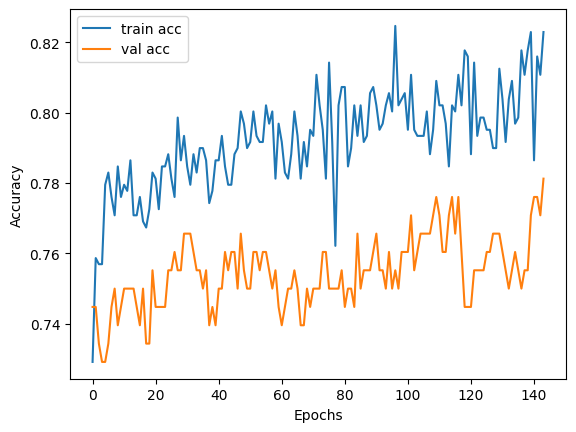

In [257]:
plt.plot(history.history['accuracy'], label="train acc")
plt.plot(history.history['val_accuracy'], label="val acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()